In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

mouse_data = "Mouse_metadata.csv"
study_data = "Study_results.csv"

mouse_data = pd.read_csv(mouse_data)
study_data = pd.read_csv(study_data)

combined_df = pd.merge(mouse_data, study_data, how = "outer", on="Mouse ID")

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
mouse_count = len(combined_df["Mouse ID"].unique())
mouse_count

249

In [47]:
duplicate = combined_df.loc[combined_df.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [48]:
duplicate_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
cleaned_df = combined_df.loc[(combined_df["Mouse ID"] != "g989")]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
total_mice = cleaned_df["Mouse ID"].nunique()
total_mice

248

In [51]:
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df ['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

data_table = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})


data_table["Mean Tumor Volume"] = data_table["Mean Tumor Volume"].map("{:.2f}".format)
data_table["Median Tumor Volume"] = data_table["Median Tumor Volume"].map("{:.2f}".format)
data_table[ "Tumor Volume Variance"] = data_table[ "Tumor Volume Variance"].map("{:.2f}".format)
data_table["Tumor Volume Std. Dev."] = data_table["Tumor Volume Std. Dev."].map("{:.2f}".format)
data_table["Tumor Volume Std. Err."] = data_table["Tumor Volume Std. Err."].map("{:.2f}".format)



data_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [52]:
aggregate_df=cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])


aggregate_df["mean"] = aggregate_df["mean"].map("{:.2f}".format)
aggregate_df["median"] = aggregate_df["median"].map("{:.2f}".format)
aggregate_df[ "var"] = aggregate_df[ "var"].map("{:.2f}".format)
aggregate_df["std"] = aggregate_df["std"].map("{:.2f}".format)
aggregate_df["sem"] = aggregate_df["sem"].map("{:.2f}".format)


aggregate_df    

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [56]:
bar_data = cleaned_df["Drug Regimen"].value_counts()
bar_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

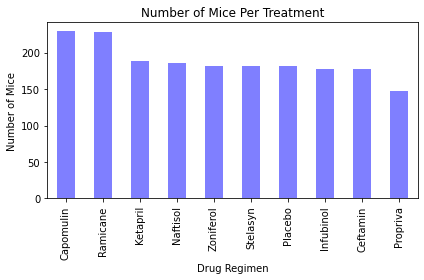

In [131]:
pandas_bar = bar_data.plot.bar(color='blue', alpha=.5, align="center")  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")
plt.tight_layout()
plt.show()

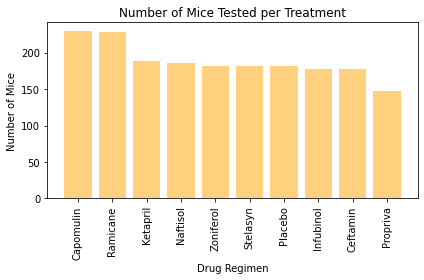

In [60]:
x_axis = bar_data.index.values
y_axis = bar_data.values

plt.bar(x_axis, y_axis, color='orange', alpha=0.5, align='center')


plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

In [65]:
cleaned_df.rename(columns = {'Sex':'Gender'},inplace = True)

In [66]:
gender = cleaned_df["Gender"].value_counts()
gender

Male      958
Female    922
Name: Gender, dtype: int64

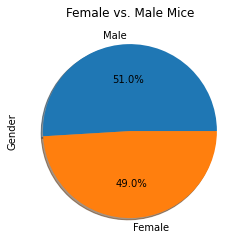

In [68]:
plt.title("Female vs. Male Mice")
gender.plot.pie(autopct= "%1.1f%%", shadow = True)
plt.show()

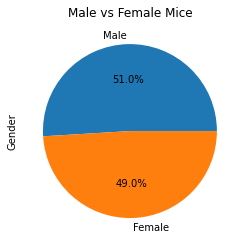

In [130]:
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mice')
plt.ylabel('Gender')
plt.show()

In [90]:
capo_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
rami_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
infub_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
ceft_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [91]:
capo_last = capo_df.groupby('Mouse ID').max()['Timepoint']
capo_merge = pd.merge(capo_last, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
capo_tumors = Capo_merge["Tumor Volume (mm3)"]

quartiles = capo_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [92]:
rami_last = rami_df.groupby('Mouse ID').max()['Timepoint']
rami_merge = pd.merge(rami_last, cleaned_df, on=("Mouse ID","Timepoint"),how="left")

rami_tumors = rami_merge["Tumor Volume (mm3)"]

quartiles = rami_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [93]:
infub_last = infub_df.groupby('Mouse ID').max()['Timepoint']
infub_merge = pd.merge(infub_last, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
infub_tumors = infub_merge["Tumor Volume (mm3)"]

quartiles = infub_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [94]:
ceft_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceft_merge= pd.merge(ceft_last, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]

quartiles = ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


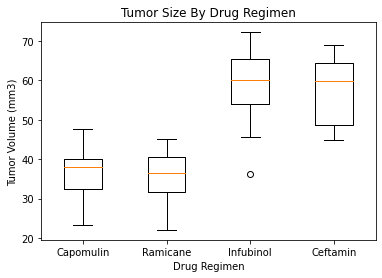

In [101]:
plt.boxplot([capo_tumors, rami_tumors, infub_tumors, ceft_tumors])
plt.title("Tumor Size By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
x_axis = np.arange(len([capo_tumors, rami_tumors, infub_tumors, ceft_tumors]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x+1)
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

In [132]:
tumor_volume=cleaned_df.set_index("Drug Regimen")
tumor_volume=tumor_volume.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],:]
tumor_volume=tumor_volume.sort_values("Mouse ID")

tumor_volume

tumor_volume=tumor_volume.groupby(["Mouse ID"])["Timepoint"].max()

tumor_data=pd.DataFrame(tumor_volume)
tumor_data=pd.merge(cleaned_df,tumor_volume,on=("Mouse ID","Timepoint"),how="right")
tumor_data

,Mouse ID,Drug Regimen,Gender,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [134]:
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]



capomulin=[]
ramicane=[]
infubinol=[]
ceftamin=[]

for index, row in tumor_data.iterrows():
        if row["Drug Regimen"] == treatments[0]:
            capomulin.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[1]:
            ramicane.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments [2]:
            infubinol.append(row["Tumor Volume (mm3)"])
        if row["Drug Regimen"] == treatments[3]:
            ceftamin.append(row["Tumor Volume (mm3)"])
            
            
tumor_final={
    "capomulin":capomulin,
    "ramicane":ramicane,
    "infubinol":infubinol,
    "ceftamin":ceftamin
}
tumor_final=pd.DataFrame(tumor_final)



greatest_tumor=[]
    
for drug in treatments:
        greatest_tumor=cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
        greatest_tumor.append(greatest_tumor)
        quartiles=greatest_tumor.quantile([.25,.5,.75])
        lowerquartile=round(quartiles[.25],2)
        upperquartile = round(quartiles[.75],2)
        mean = greatest_tumor.mean()
        iqr = round(upperq-lowerq,2)  

        print("Regimen:",drug)
        print("Lower quartile for",drug,"is:", lowerquartile)
        print("Upper quartile for" ,drug, "is:",upperquartile)
        print("Interquartile range for",drug, "is:",iqr)
        print("")
   

Regimen: Capomulin
Lower quartile for Capomulin is: 37.69
Upper quartile for Capomulin is: 45.0
Interquartile range for Capomulin is: 15.58

Regimen: Ramicane
Lower quartile for Ramicane is: 36.67
Upper quartile for Ramicane is: 45.0
Interquartile range for Ramicane is: 15.58

Regimen: Infubinol
Lower quartile for Infubinol is: 47.31
Upper quartile for Infubinol is: 57.31
Interquartile range for Infubinol is: 15.58

Regimen: Ceftamin
Lower quartile for Ceftamin is: 47.21
Upper quartile for Ceftamin is: 56.8
Interquartile range for Ceftamin is: 15.58



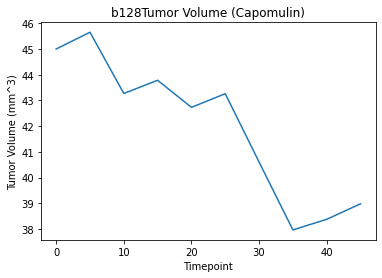

In [105]:
capo_line = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
mouse = capo_line["Mouse ID"].sample()
mouse = pd.DataFrame(mouse)
mouse = mouse.iloc[0,0]
mouse

capo_line = capo_line.loc[cleaned_df["Mouse ID"]==mouse]

x = capo_line["Timepoint"]
y = capo_line["Tumor Volume (mm3)"]
plt.plot(x,y)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm^3)")
plt.title(mouse + "Tumor Volume (Capomulin)")
plt.show()

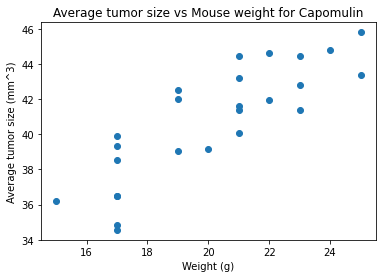

In [106]:
capo_scatter = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
capo_mean = capo_scatter.groupby(["Mouse ID"]).mean()
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor size (mm^3)")
plt.title("Average tumor size vs Mouse weight for Capomulin")
x = capo_mean["Weight (g)"]
y = capo_mean["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.show()

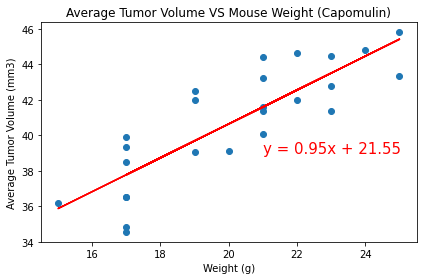

In [122]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress, "r-")
plt.annotate(line_eq, (21,39), fontsize = 15, color="red")
plt.title("Average Tumor Volume VS Mouse Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

In [128]:
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}. This is a positive strong correlation.")

The correlation between mouse weight and the average tumor volume is 0.84. This is a positive strong correlation.
